In [ ]:
!pip install opencv-python

from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Upload the 'screenshot.jpg' image to your Colab environment
uploaded = files.upload()

# Read the uploaded image using OpenCV
img = cv2.imread(next(iter(uploaded)), cv2.IMREAD_GRAYSCALE)




Saving image.jpg to image.jpg


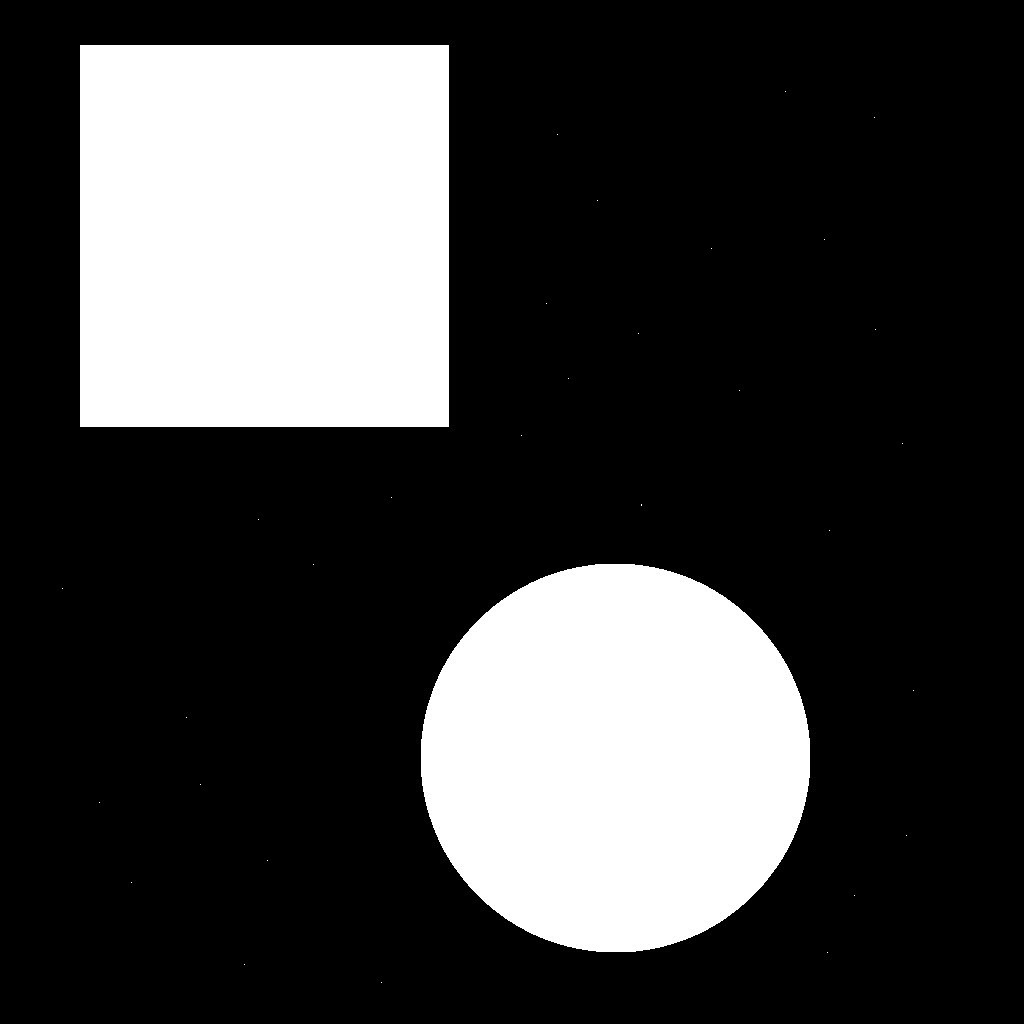

In [ ]:
# Display the original image:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV Version: 4.8.0


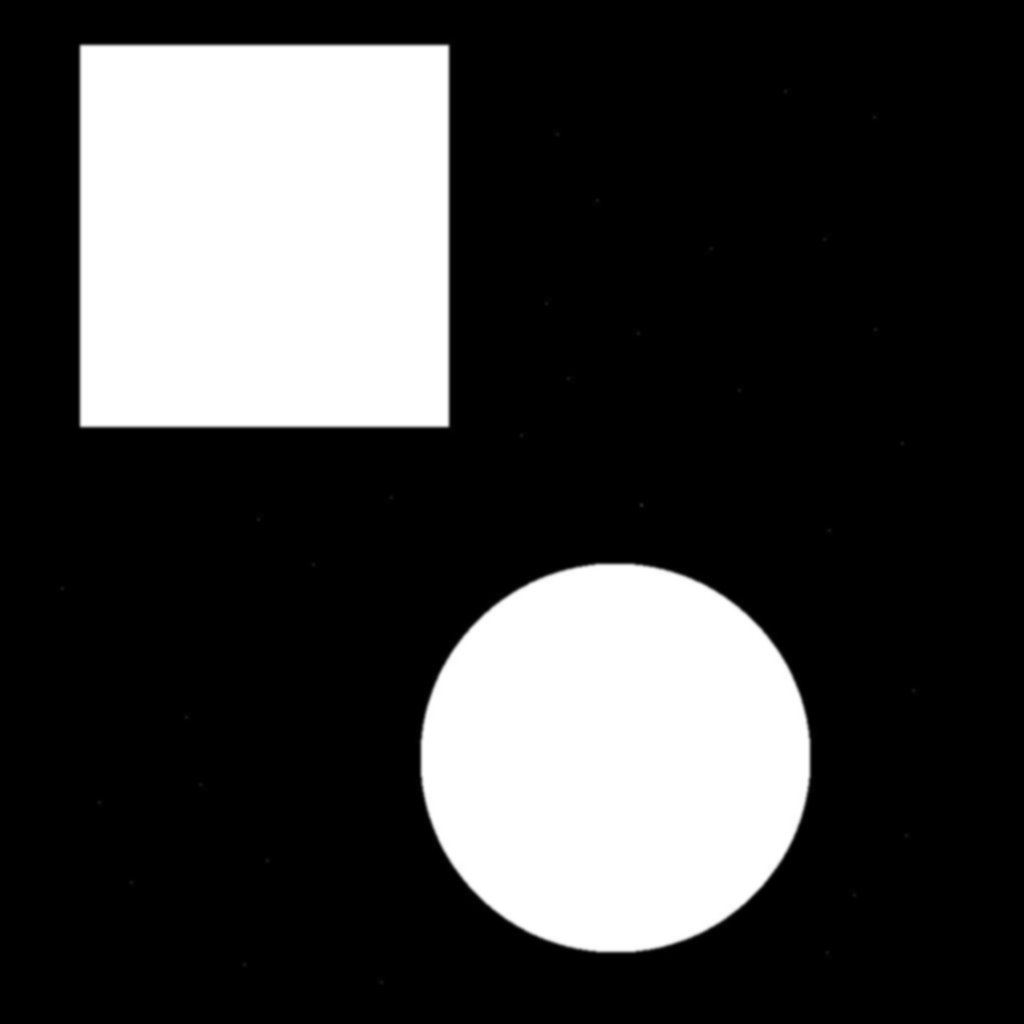

In [ ]:
# Apply Gaussian blur for noise reduction
blurred_img = cv2.GaussianBlur(img, (7, 7), 0)

# Display the OpenCV version
print("OpenCV Version:", cv2.__version__)

# Display the blurred image:
from google.colab.patches import cv2_imshow
cv2_imshow(blurred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




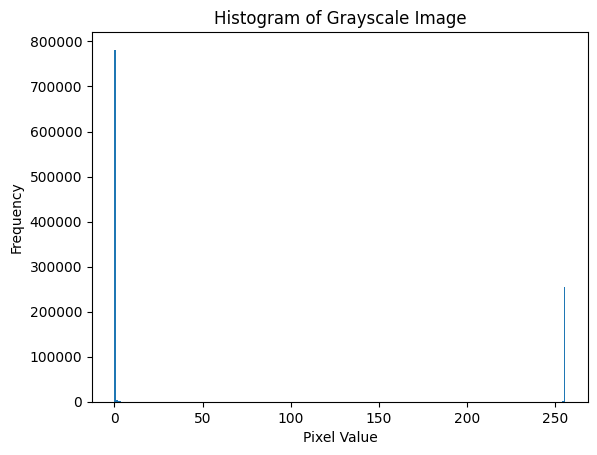

In [ ]:

# Plot the histogram
plt.hist(img.ravel(), 256, [0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.show()

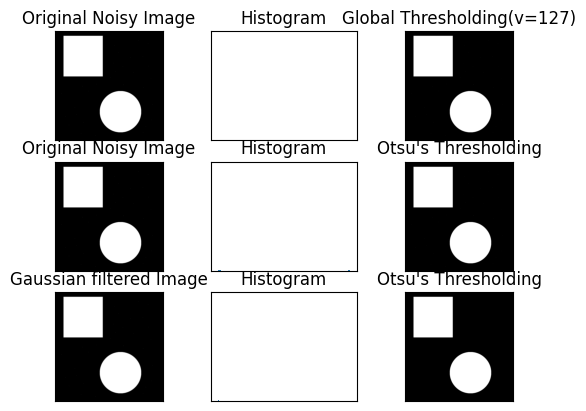

In [ ]:
# Global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding(v=127)',
 'Original Noisy Image','Histogram',"Otsu's Thresholding",
 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

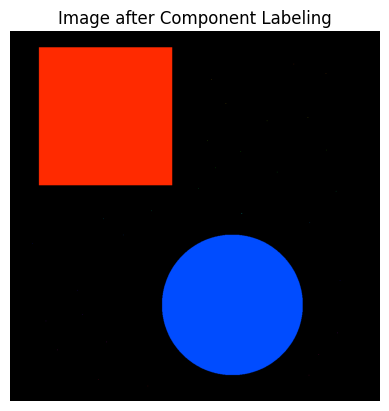

In [ ]:
def connected_component_label(path):
 # Getting the input image
 img = cv2.imread(next(iter(uploaded)), cv2.IMREAD_GRAYSCALE)
 # Converting those pixels with values 1-127 to 0 and others to 1
 img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
 # Applying cv2.connectedComponents()
 num_labels, labels = cv2.connectedComponents(img)
 # Map component labels to hue val, 0-179 is the hue range in OpenCV
 label_hue = np.uint8(179*labels/np.max(labels))
 blank_ch = 255*np.ones_like(label_hue)
 labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
 # Converting cvt to BGR
 labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
 # set bg label to black
 labeled_img[label_hue==0] = 0
 #Showing Image after Component Labeling
 plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
 plt.axis('off')
 plt.title("Image after Component Labeling")
 plt.show()
connected_component_label(img)

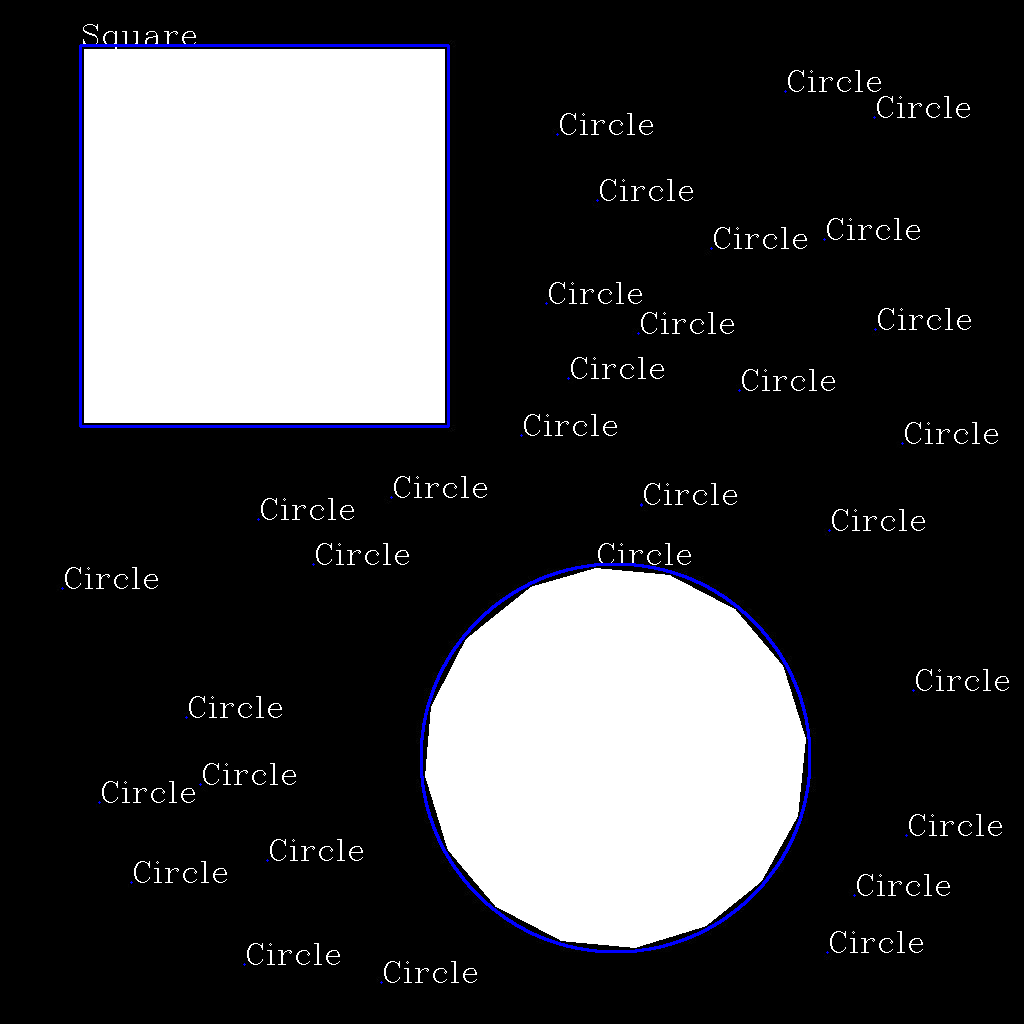

In [ ]:
# Pattern recognition (Original Image):
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_COMPLEX
#img = cv2.imread('Screenshot1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread(next(iter(uploaded)), cv2.IMREAD_GRAYSCALE)
_, threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 4:
        cv2.putText(img, "Square", (x, y), font, 1, (255))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (255))

img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)

cv2_imshow(img)

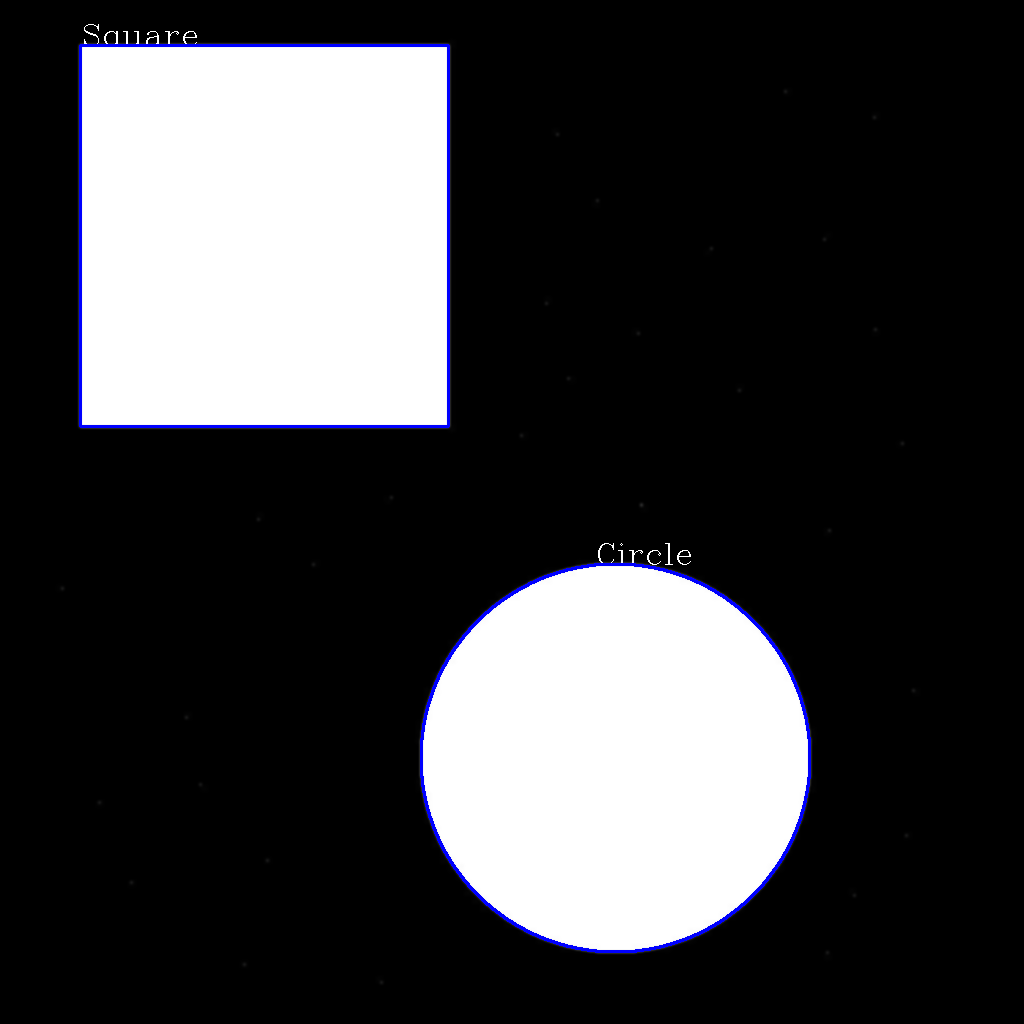

In [ ]:
# Pattern recognition: Remove Salt and Pepper Noise (Filtered Image):
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.imread(next(iter(uploaded)), cv2.IMREAD_GRAYSCALE)
# Apply Gaussian blur for noise reduction
filtered_imag = cv2.GaussianBlur(img, (7, 7), 0)

_, threshold = cv2.threshold(filtered_imag, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    if len(approx) == 4:
        cv2.putText(filtered_imag, "Square", (x, y), font, 1, (255))
    else:
        cv2.putText(filtered_imag, "Circle", (x, y), font, 1, (255))

filtered_imag = cv2.cvtColor(filtered_imag, cv2.COLOR_GRAY2BGR)
cv2.drawContours(filtered_imag, contours, -1, (255, 0, 0), 2)

cv2_imshow(filtered_imag)
cv2.waitKey(0)
cv2.destroyAllWindows()
